In [1]:
import os
import sys
import pandas as pd
import scanpy as sc

import matplotlib.pyplot as plt
import seaborn as sns

from pyprojroot import here

from glob import glob
from tqdm import tqdm

# Import custom functions
sys.path.insert(1, str(here('bin')))
from customPalette import level1_palette
from customPythonFunctions import aggregate_cells

import nextflow

In [2]:
%load_ext autoreload
%autoreload 2

**Before executing the notebook, remember to run *module load Java***

In [3]:
#mainAdataFile = os.path.join(baseDir, "00_data_processing/results/01_INFLAMMATION_raw_unsplitted.h5ad")

mainAdataFile = str(here('02_fromCellLineages_to_CellTypes/INFLAMMATION_main_annotated_LowQFilt.h5ad'))

SCxSEACell = 50
exclude_CellTypes = ['Platelets','Progenitors','RBC','Cycling_cells']
annotationCol = 'Level1'

outDir = str(here('03_downstream_analysis/03_SEAcell_generation/results'))
outFileName = "01_INFLAMMATION_main_SEAcell.pkl"

In [4]:
# check if the output file is already present, otherwise run the pipeline
if not os.path.isfile(os.path.join(outDir,outFileName)):
    if not os.path.isfile(mainAdataFile):
        raise ValueError('main Adata file is not present')
    out = !java -version
    assert out[0].startswith('openjdk version')
    execution = nextflow.run(str(here("03_downstream_analysis/03_SEAcell_generation/SEAcell_generation.nf")), 
                             params={"SCxSEACell": f"{SCxSEACell}", 
                                     "mainAdataFilePath":mainAdataFile,
                                     "annotation_col": annotationCol,
                                     "exclude_CellTypes": ','.join(exclude_CellTypes),
                                     "outputdir":outDir,
                                     "outputFileName":outFileName},
                             profiles = ["cluster"], 
                             configs = [str(here("03_downstream_analysis/03_SEAcell_generation/nextflow.config"))])
    assert(execution.status == 'OK')
    # Cleaning temporary files generated by nextflow
    !rm -rf work
    !rm -rf .nextflow*
    !rm rc.txt
    !rm stderr.txt
    !rm stdout.txt

# Checking SEACell profiles
**Loading generated SEAcells**

In [5]:
SEAcells = pd.read_pickle(os.path.join(outDir,outFileName))
SEAcells

,SEACell,SEACell_weight,SEACell_non_trivial_assig,compactness,separation
index,,,,,
COMBAT2022_L007_G05164_T0_AAACCTGGTGTCGCTG,COMBAT2022_G05164_T0_SEACell-9,0.195294,2,0.001643,0.027085
COMBAT2022_L007_G05164_T0_AAACGGGGTTCTGTTT,COMBAT2022_G05164_T0_SEACell-77,0.196078,2,0.003316,0.026428
COMBAT2022_L007_G05164_T0_AAAGATGCAAGCTGAG,COMBAT2022_G05164_T0_SEACell-23,0.239216,4,0.000944,0.015248
COMBAT2022_L007_G05164_T0_AAAGCAACATCGGTTA,COMBAT2022_G05164_T0_SEACell-25,0.972549,1,0.028634,0.158046
COMBAT2022_L007_G05164_T0_AAAGTAGAGGGCACTA,COMBAT2022_G05164_T0_SEACell-63,0.453333,1,0.006936,0.122406
...,...,...,...,...,...
Reyes2020_L017_P671_T0_TTTGTCACACAACGTT,Reyes2020_P671_T0_SEACell-39,0.320000,1,0.005681,0.124437
Reyes2020_L017_P671_T0_TTTGTCACAGGAATCG,Reyes2020_P671_T0_SEACell-7,0.365490,2,0.032428,0.644896
Reyes2020_L017_P671_T0_TTTGTCACATCCGCGA,Reyes2020_P671_T0_SEACell-36,0.440784,2,0.001804,0.096053


**Loading main dataset**

In [6]:
adata = sc.read_h5ad(mainAdataFile, backed='r')
adata

AnnData object with n_obs × n_vars = 4435922 × 22838 backed at '/scratch_isilon/groups/singlecell/shared/projects/Inflammation-PBMCs-Atlas/02_fromCellLineages_to_CellTypes/INFLAMMATION_main_annotated_LowQFilt.h5ad'
    obs: 'studyID', 'libraryID', 'sampleID', 'chemistry', 'disease', 'sex', 'binned_age', 'Level1', 'Level2'
    var: 'hgnc_id', 'symbol', 'locus_group', 'HUGO_status'

### Merging SEAcell with adata.obs

In [7]:
SEAcellAnnotated = SEAcells.merge(adata.obs[['sampleID','Level1','disease']], left_index=True, right_index = True, how='left')

In [8]:
SEAcellAnnotated

,SEACell,SEACell_weight,SEACell_non_trivial_assig,compactness,separation,sampleID,Level1,disease
index,,,,,,,,
COMBAT2022_L007_G05164_T0_AAACCTGGTGTCGCTG,COMBAT2022_G05164_T0_SEACell-9,0.195294,2,0.001643,0.027085,COMBAT2022_G05164_T0,T_CD4_NonNaive,COVID
COMBAT2022_L007_G05164_T0_AAACGGGGTTCTGTTT,COMBAT2022_G05164_T0_SEACell-77,0.196078,2,0.003316,0.026428,COMBAT2022_G05164_T0,T_CD4_NonNaive,COVID
COMBAT2022_L007_G05164_T0_AAAGATGCAAGCTGAG,COMBAT2022_G05164_T0_SEACell-23,0.239216,4,0.000944,0.015248,COMBAT2022_G05164_T0,T_CD4_Naive,COVID
COMBAT2022_L007_G05164_T0_AAAGCAACATCGGTTA,COMBAT2022_G05164_T0_SEACell-25,0.972549,1,0.028634,0.158046,COMBAT2022_G05164_T0,T_CD4_NonNaive,COVID
COMBAT2022_L007_G05164_T0_AAAGTAGAGGGCACTA,COMBAT2022_G05164_T0_SEACell-63,0.453333,1,0.006936,0.122406,COMBAT2022_G05164_T0,T_CD4_NonNaive,COVID
...,...,...,...,...,...,...,...,...
Reyes2020_L017_P671_T0_TTTGTCACACAACGTT,Reyes2020_P671_T0_SEACell-39,0.320000,1,0.005681,0.124437,Reyes2020_P671_T0,Mono,sepsis
Reyes2020_L017_P671_T0_TTTGTCACAGGAATCG,Reyes2020_P671_T0_SEACell-7,0.365490,2,0.032428,0.644896,Reyes2020_P671_T0,Mono,sepsis
Reyes2020_L017_P671_T0_TTTGTCACATCCGCGA,Reyes2020_P671_T0_SEACell-36,0.440784,2,0.001804,0.096053,Reyes2020_P671_T0,Mono,sepsis


### Checking SEAcell quality

**Number of SEAcells**

In [9]:
print(f" We generated {SEAcellAnnotated.SEACell.unique().shape[0]} SEAcells")

 We generated 84948 SEAcells


**Number of non-trivial assignments**

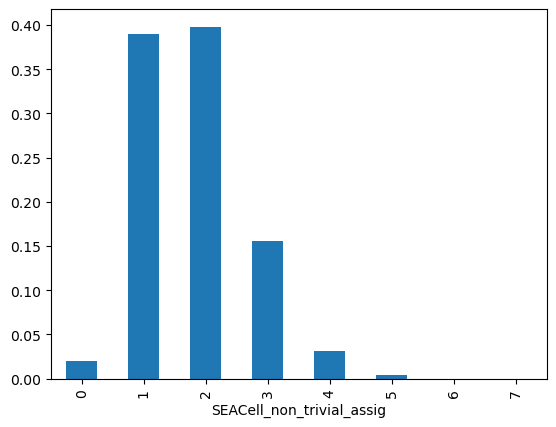

In [10]:
#adataFilt.obs.value_counts('SEACell_non_trivial_assig', normalize=True).sort_index().plot.bar()
SEAcellAnnotated.value_counts('SEACell_non_trivial_assig', normalize=True).sort_index().plot.bar()
plt.show()

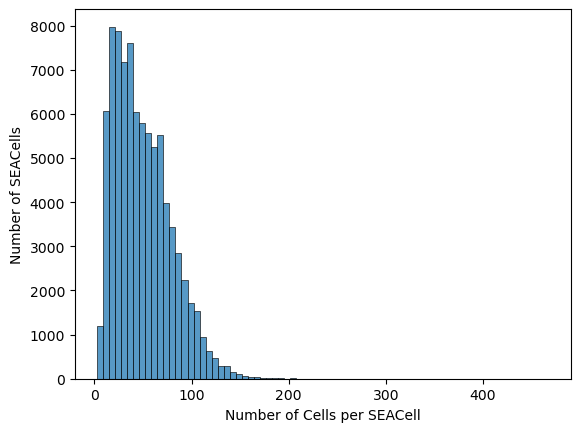

In [11]:
#seacell_counts = adataFilt.obs['SEACell'].value_counts()
seacell_counts = SEAcellAnnotated['SEACell'].value_counts()
fig = sns.histplot(seacell_counts, bins=75, )
fig.set_xlabel('Number of Cells per SEACell')
fig.set_ylabel('Number of SEACells')
plt.show()

# Agregate SEACells

In [12]:
SEAdataDF, CTpropDF = aggregate_cells(adata=None,
                          SEAcellDF=SEAcellAnnotated,
                          #feature_mtx = 'counts',
                          #how = 'sum', 
                          SEAcellIDcol = 'SEACell',
                          annotationCol = 'Level1', 
                          SEACellMetadataCols = ['sampleID','disease','compactness','separation'], 
                          returnAllCellTypeProportion=True,
                          workers=32,
                          return_adata = True)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 84948/84948 [19:42<00:00, 71.86it/s]


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 84948/84948 [00:00<00:00, 787551.47it/s]


## Check SEAcells compositions

In [13]:
# 'Platelets','Progenitors','RBC','T_NK_cycling'
SEAdataDF.MostAbundantCellType

COMBAT2022_G05061_T0_SEACell-0      T_CD4_NonNaive
COMBAT2022_G05061_T0_SEACell-1                 ILC
COMBAT2022_G05061_T0_SEACell-10               Mono
COMBAT2022_G05061_T0_SEACell-100               ILC
COMBAT2022_G05061_T0_SEACell-101              Mono
                                         ...      
Zhang2023_P191217_T0_SEACell-63     T_CD8_NonNaive
Zhang2023_P191217_T0_SEACell-64     T_CD8_NonNaive
Zhang2023_P191217_T0_SEACell-7      T_CD8_NonNaive
Zhang2023_P191217_T0_SEACell-8      T_CD4_NonNaive
Zhang2023_P191217_T0_SEACell-9      T_CD8_NonNaive
Name: MostAbundantCellType, Length: 84948, dtype: object

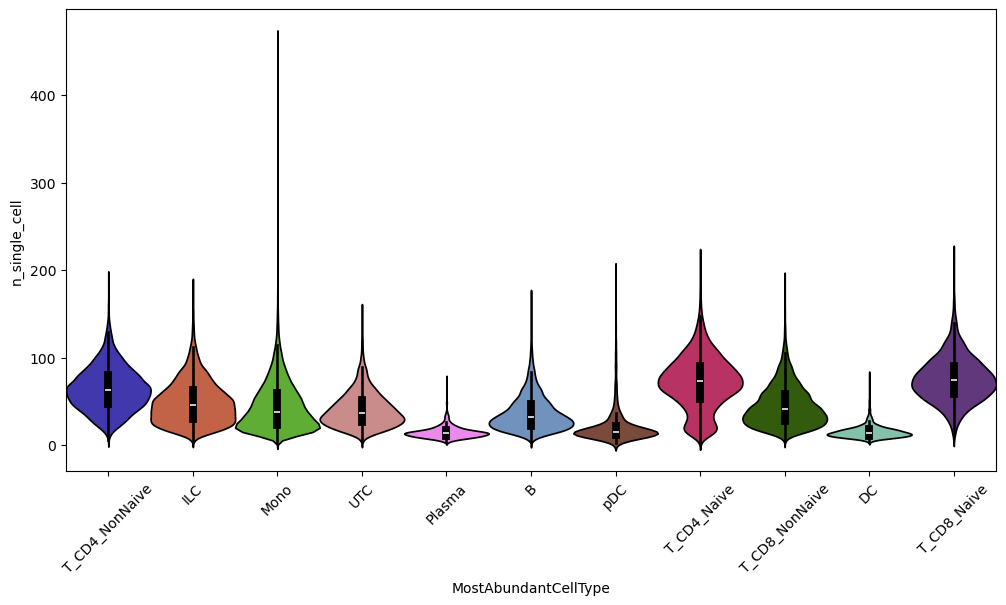

In [14]:
plt.figure(figsize=(12,6))

sns.violinplot(data=SEAdataDF, x = 'MostAbundantCellType', hue='MostAbundantCellType', legend=False, y='n_single_cell', width = 1, palette=level1_palette)

plt.xticks(rotation=45)
plt.show()

## Check SEAcells purity

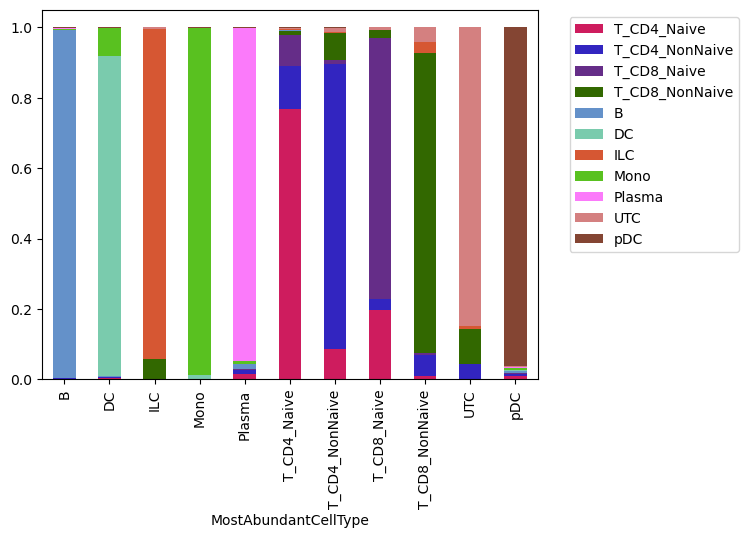

In [15]:
CTpropDF['MostAbundantCellType'] = SEAdataDF.MostAbundantCellType
CTpropDist = CTpropDF.groupby('MostAbundantCellType', observed=False).mean()

# for ct_i in CTpropDist.index:
#     CTpropDist.loc[ct_i, ct_i] = 0

CTpropDist.plot(kind = 'bar', stacked = True, color = [level1_palette[c] for c in CTpropDist.columns])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [16]:
purityThr = 0.75

In [17]:
SEAdataDF['lowPurity'] = SEAdataDF.MostAbundantCellType_proportion < purityThr

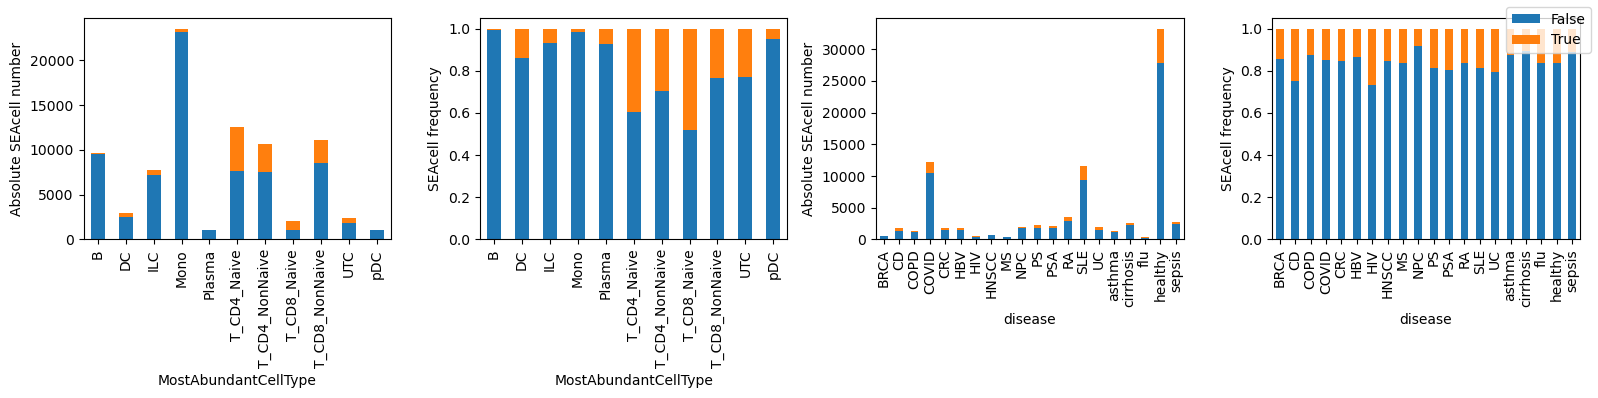

In [18]:
groupedMACT= SEAdataDF.groupby(['MostAbundantCellType','lowPurity'], observed=False).size().unstack()
normalizedMACT = groupedMACT.div(groupedMACT.sum(axis=1), axis=0)

groupedDisease = SEAdataDF.groupby(['disease','lowPurity'], observed=False).size().unstack()
normalizedDisease = groupedDisease.div(groupedDisease.sum(axis=1), axis=0)

# Create a figure with 2 subplots (1 row, 2 columns)
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16, 4))


# Create a stacked bar plot in the first subplot
groupedMACT.plot(kind='bar', stacked=True, ax=axes[0], legend=False) # Turn off the legend
axes[0].set_ylabel('Absolute SEAcell number')

# Create a normalized stacked bar plot in the second subplot
normalizedMACT.plot(kind='bar', stacked=True, ax=axes[1], legend=False)
axes[1].set_ylabel('SEAcell frequency')

# Create a stacked bar plot in the first subplot
groupedDisease.plot(kind='bar', stacked=True, ax=axes[2], legend=False) # Turn off the legend
axes[2].set_ylabel('Absolute SEAcell number')

# Create a normalized stacked bar plot in the second subplot
normalizedDisease.plot(kind='bar', stacked=True, ax=axes[3], legend=False)
axes[3].set_ylabel('SEAcell frequency')

# Create a single legend for the whole figure
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')

# Display the plots
plt.tight_layout()
plt.show()



### Filter low purity cells

In [19]:
assert (SEAdataDF.index == CTpropDF.index).all()

In [20]:
SEAdataFilt = SEAdataDF[SEAdataDF.lowPurity == False]
CTpropDFfilt = CTpropDF[SEAdataDF.lowPurity == False]

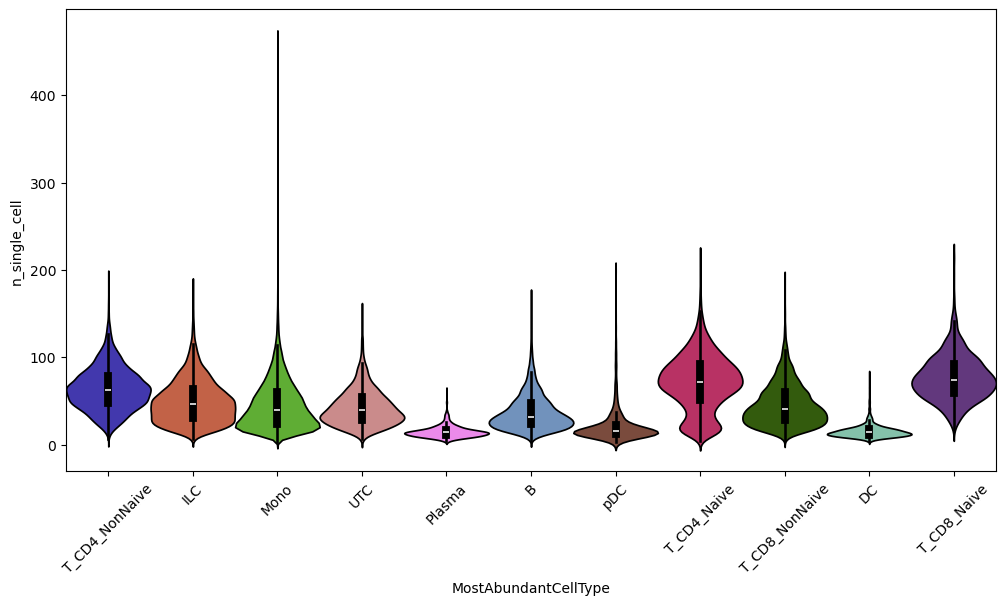

In [21]:
plt.figure(figsize=(12,6))

sns.violinplot(data=SEAdataFilt, x = 'MostAbundantCellType', hue='MostAbundantCellType', legend=False, y='n_single_cell', width = 1, palette=level1_palette)

plt.xticks(rotation=45)
plt.show()

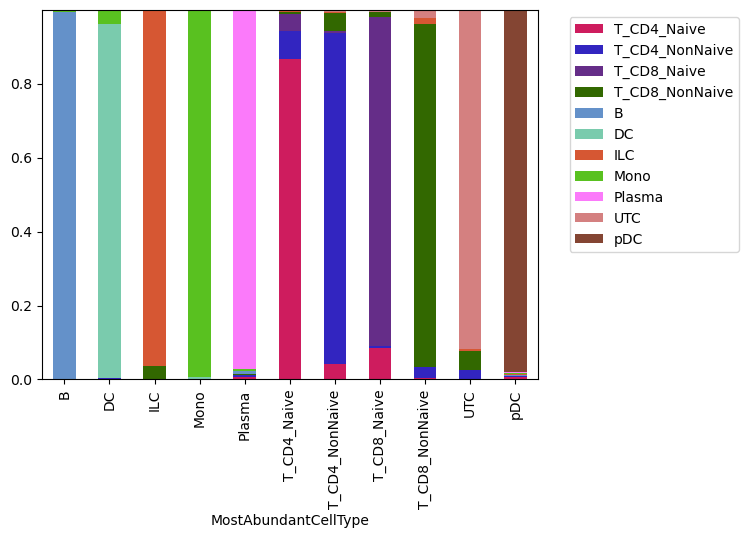

In [22]:
import matplotlib.pyplot as plt
CTpropDist = CTpropDFfilt.groupby('MostAbundantCellType', observed=False).mean()

# for ct_i in CTpropDist.index:
#     CTpropDist.loc[ct_i, ct_i] = 0

CTpropDist.plot(kind = 'bar', stacked = True, color = [level1_palette[c] for c in CTpropDist.columns])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Save annotated SEACell object

In [23]:
SEAdataFiltClean = SEAdataFilt.drop(['MostAbundantCellType_proportion','n_single_cell','compactness','separation','lowPurity'], axis=1)
SEAdataFiltClean

,MostAbundantCellType,sampleID,disease
COMBAT2022_G05061_T0_SEACell-0,T_CD4_NonNaive,COMBAT2022_G05061_T0,COVID
COMBAT2022_G05061_T0_SEACell-1,ILC,COMBAT2022_G05061_T0,COVID
COMBAT2022_G05061_T0_SEACell-10,Mono,COMBAT2022_G05061_T0,COVID
COMBAT2022_G05061_T0_SEACell-100,ILC,COMBAT2022_G05061_T0,COVID
COMBAT2022_G05061_T0_SEACell-101,Mono,COMBAT2022_G05061_T0,COVID
...,...,...,...
Zhang2023_P191217_T0_SEACell-61,B,Zhang2023_P191217_T0,HBV
Zhang2023_P191217_T0_SEACell-62,UTC,Zhang2023_P191217_T0,HBV
Zhang2023_P191217_T0_SEACell-64,T_CD8_NonNaive,Zhang2023_P191217_T0,HBV
Zhang2023_P191217_T0_SEACell-7,T_CD8_NonNaive,Zhang2023_P191217_T0,HBV


#### Filtered single-cell to SEAcell dataframe

In [24]:
SEAdataFiltClean

,MostAbundantCellType,sampleID,disease
COMBAT2022_G05061_T0_SEACell-0,T_CD4_NonNaive,COMBAT2022_G05061_T0,COVID
COMBAT2022_G05061_T0_SEACell-1,ILC,COMBAT2022_G05061_T0,COVID
COMBAT2022_G05061_T0_SEACell-10,Mono,COMBAT2022_G05061_T0,COVID
COMBAT2022_G05061_T0_SEACell-100,ILC,COMBAT2022_G05061_T0,COVID
COMBAT2022_G05061_T0_SEACell-101,Mono,COMBAT2022_G05061_T0,COVID
...,...,...,...
Zhang2023_P191217_T0_SEACell-61,B,Zhang2023_P191217_T0,HBV
Zhang2023_P191217_T0_SEACell-62,UTC,Zhang2023_P191217_T0,HBV
Zhang2023_P191217_T0_SEACell-64,T_CD8_NonNaive,Zhang2023_P191217_T0,HBV
Zhang2023_P191217_T0_SEACell-7,T_CD8_NonNaive,Zhang2023_P191217_T0,HBV


In [25]:
SEAdataFiltCleanM = SEAcells.merge(SEAdataFiltClean, left_on = 'SEACell', right_index = True, how = 'right')

In [26]:
SEAdataFiltCleanM.drop(['SEACell_weight','SEACell_non_trivial_assig','compactness','separation'],axis=1,inplace=True)

In [27]:
SEAdataFiltCleanM.rename({'MostAbundantCellType':'Level1'}, axis=1, inplace=True)

In [28]:
SEAdataFiltCleanM

,SEACell,Level1,sampleID,disease
index,,,,
COMBAT2022_L014_G05061_T0_AAGGTTCGTCCGACGT,COMBAT2022_G05061_T0_SEACell-0,T_CD4_NonNaive,COMBAT2022_G05061_T0,COVID
COMBAT2022_L014_G05061_T0_GAACCTATCGCTTGTC,COMBAT2022_G05061_T0_SEACell-0,T_CD4_NonNaive,COMBAT2022_G05061_T0,COVID
COMBAT2022_L015_G05061_T0_GAACGGACAGGGTATG,COMBAT2022_G05061_T0_SEACell-0,T_CD4_NonNaive,COMBAT2022_G05061_T0,COVID
COMBAT2022_L015_G05061_T0_GTACTCCGTCCTCTTG,COMBAT2022_G05061_T0_SEACell-0,T_CD4_NonNaive,COMBAT2022_G05061_T0,COVID
COMBAT2022_L016_G05061_T0_ACTTGTTAGATAGCAT,COMBAT2022_G05061_T0_SEACell-0,T_CD4_NonNaive,COMBAT2022_G05061_T0,COVID
...,...,...,...,...
Zhang2023_L022_P191217_T0_TGGCTGGGTGGCGAAT,Zhang2023_P191217_T0_SEACell-9,T_CD8_NonNaive,Zhang2023_P191217_T0,HBV
Zhang2023_L022_P191217_T0_TGTTCCGAGCCATCGC,Zhang2023_P191217_T0_SEACell-9,T_CD8_NonNaive,Zhang2023_P191217_T0,HBV
Zhang2023_L022_P191217_T0_TTCGGTCGTAGCGCTC,Zhang2023_P191217_T0_SEACell-9,T_CD8_NonNaive,Zhang2023_P191217_T0,HBV


In [30]:
SEAdataFiltCleanM.to_pickle(here('03_downstream_analysis/03_SEAcell_generation/results/01_MAIN_SEAcell_annotated_LowPurityFilt.pkl'))